In [43]:
from Library import generateKey
import time

# ================================================================================================
# Functions
# ================================================================================================
def factorize(n):
	if (n % 2) == 0:
		return [2] + factorize(n//2)
	
	num = 3
	while num <= (n**0.5):
		if n % num == 0:
			return [num] + factorize(n // num)
		else:
			num += 2
	return [n]

def getPrivateKey(e, n):
	factors = factorize(n)
	phi = (factors[0] - 1) * (factors[1] - 1)
	d = pow(e, -1, phi)
	return d
# ================================================================================================

# ================================================================================================
# Main
# ================================================================================================
# Create files for number of bits and time required
bitsFile = open("bits.txt", "a")
timeFile = open("time.txt", "a")

for i in range(14, 33):
	# Generate the key
	e, d, n = generateKey(i)

	bitsFile.write(str(i) + "\n")

	# Attack
	start = time.time()
	privateKey = getPrivateKey(e, n)
	end = time.time()

	timeFile.write(str(end - start) + "\n")
	start = end = 0

bitsFile.close()
timeFile.close()
# ================================================================================================

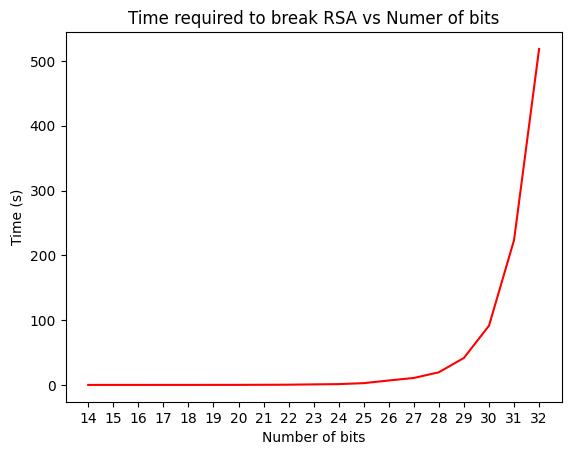

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bitsArray = np.loadtxt("bits.txt")
timeArray = np.loadtxt("time.txt")

plt.plot(bitsArray, timeArray, color="red")
plt.xticks(bitsArray)
plt.xlabel("Number of bits")
plt.ylabel("Time (s)")
plt.title("Time required to break RSA vs Numer of bits")
plt.show()